In [9]:
import torch
import pandas as pd
import os
main_dir = '../wind-profiles/to-test/csvs'
total_size = 640
segment_to_skip = 503

# three dimensional tensors, with shape (len(dir), 640, 9) and (len(dir), 640, 3)
X_data = torch.empty(0, total_size - segment_to_skip, 4)
y_data = torch.empty(0, total_size - segment_to_skip, 3)

for file_ in os.listdir(f'{main_dir}'):
    data = pd.read_csv(f'{main_dir}/{file_}', delimiter=',', 
                    header=0, names=['R','L','n','v','T','B','A/A0','alpha'], 
                    skiprows=0, dtype=float, na_values=['                      NaN', '                     -NaN'])
    
    # if data has NaN values in R column, continue to next file
    if data[['R', 'B', 'alpha', 'n', 'v', 'T']].isnull().values.any():
        continue
    
    # convert to tensor, with shape (len(data), 3), where the three channels are R, B, alpha
    X_sample = torch.tensor(data[['R', 'L', 'B', 'alpha']].values, dtype=torch.float32)
    y_sample = torch.tensor(data[['n', 'v', 'T']].values, dtype=torch.float32)
    
    X_data = torch.cat((X_data, X_sample[segment_to_skip:, :].unsqueeze(0)), dim=0)
    y_data = torch.cat((y_data, y_sample[segment_to_skip:, :].unsqueeze(0)), dim=0)

In [10]:
X_data = X_data.permute(0, 2, 1)
y_data = y_data.permute(0, 2, 1)

In [11]:
X_data.shape, y_data.shape

(torch.Size([369, 4, 137]), torch.Size([369, 3, 137]))

In [12]:
# min and max for each channel, and min for each sample when absolute value is taken
X_min = X_data.min(dim=2).values.abs().min(dim=0).values
X_max = X_data.max(dim=2).values.abs().max(dim=0).values
y_min = y_data.min(dim=2).values.abs().min(dim=0).values
y_max = y_data.max(dim=2).values.abs().max(dim=0).values

X_min, X_max, y_min, y_max

(tensor([5.8894e+00, 6.1726e+00, 2.0679e-04, 0.0000e+00]),
 tensor([3.1496e+01, 3.1501e+01, 7.6904e-03, 0.0000e+00]),
 tensor([3.9297e+00, 3.0013e-05, 5.1806e-03]),
 tensor([6.8830e+04, 5.6179e+02, 1.4052e+00]))

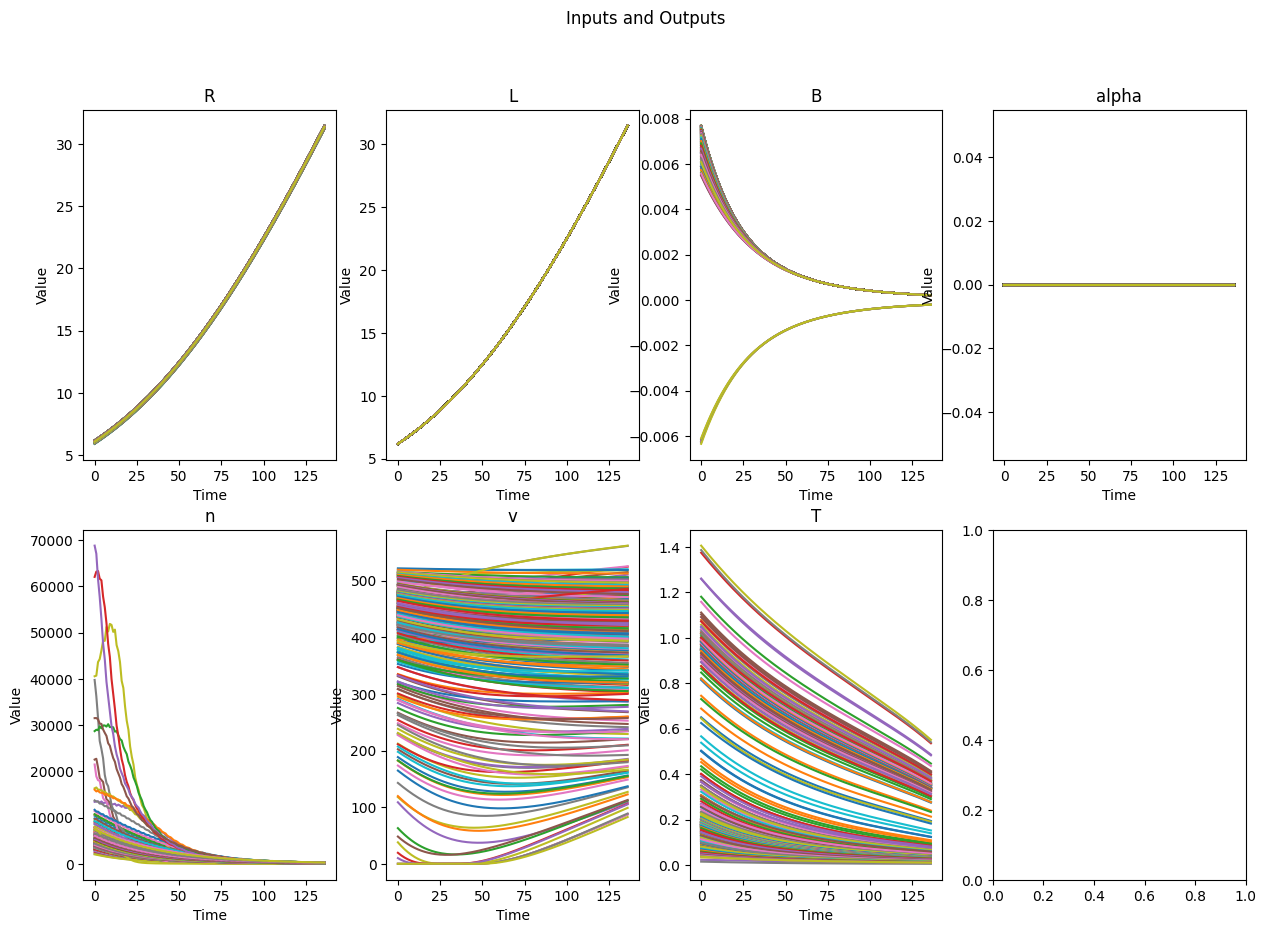

In [22]:
# plot inputs and outputs
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(2, 4, figsize=(15, 10))
fig.suptitle('Inputs and Outputs')

input_names = ['R', 'L', 'B', 'alpha']
output_names = ['n', 'v', 'T']

for i in range(3):
    axs[0, i].plot(X_data[:, i, :].abs().T.numpy())
    axs[0, i].set_title(f'{input_names[i]}')
    axs[0, i].set_xlabel('Time')
    axs[0, i].set_ylabel('Value')
    
    axs[1, i].plot(y_data[:, i, :].abs().T.numpy())
    axs[1, i].set_title(f'{output_names[i]}')
    axs[1, i].set_xlabel('Time')
    axs[1, i].set_ylabel('Value')

    
axs[0, 3].plot(X_data[:, 3, :].T.numpy())
axs[0, 3].set_title(f'{input_names[3]}')
axs[0, 3].set_xlabel('Time')
axs[0, 3].set_ylabel('Value')

plt.show()

In [13]:
# load tensors from file
X_data = torch.load('X_data.pt')
y_data = torch.load('y_data.pt')

In [14]:
# min and max for each channel, and min for each sample when absolute value is taken
X_min = X_data.min(dim=2).values.abs().min(dim=0).values
X_max = X_data.max(dim=2).values.abs().max(dim=0).values
y_min = y_data.min(dim=2).values.abs().min(dim=0).values
y_max = y_data.max(dim=2).values.abs().max(dim=0).values

X_min, X_max, y_min, y_max

(tensor([5.4303e+00, 6.1726e+00, 6.8134e-04, 0.0000e+00]),
 tensor([31.5014, 31.5014,  0.0440,  0.0000]),
 tensor([1.9728e+01, 1.5076e-05, 5.7649e-03]),
 tensor([1.3310e+05, 1.1316e+03, 4.9130e+00]))

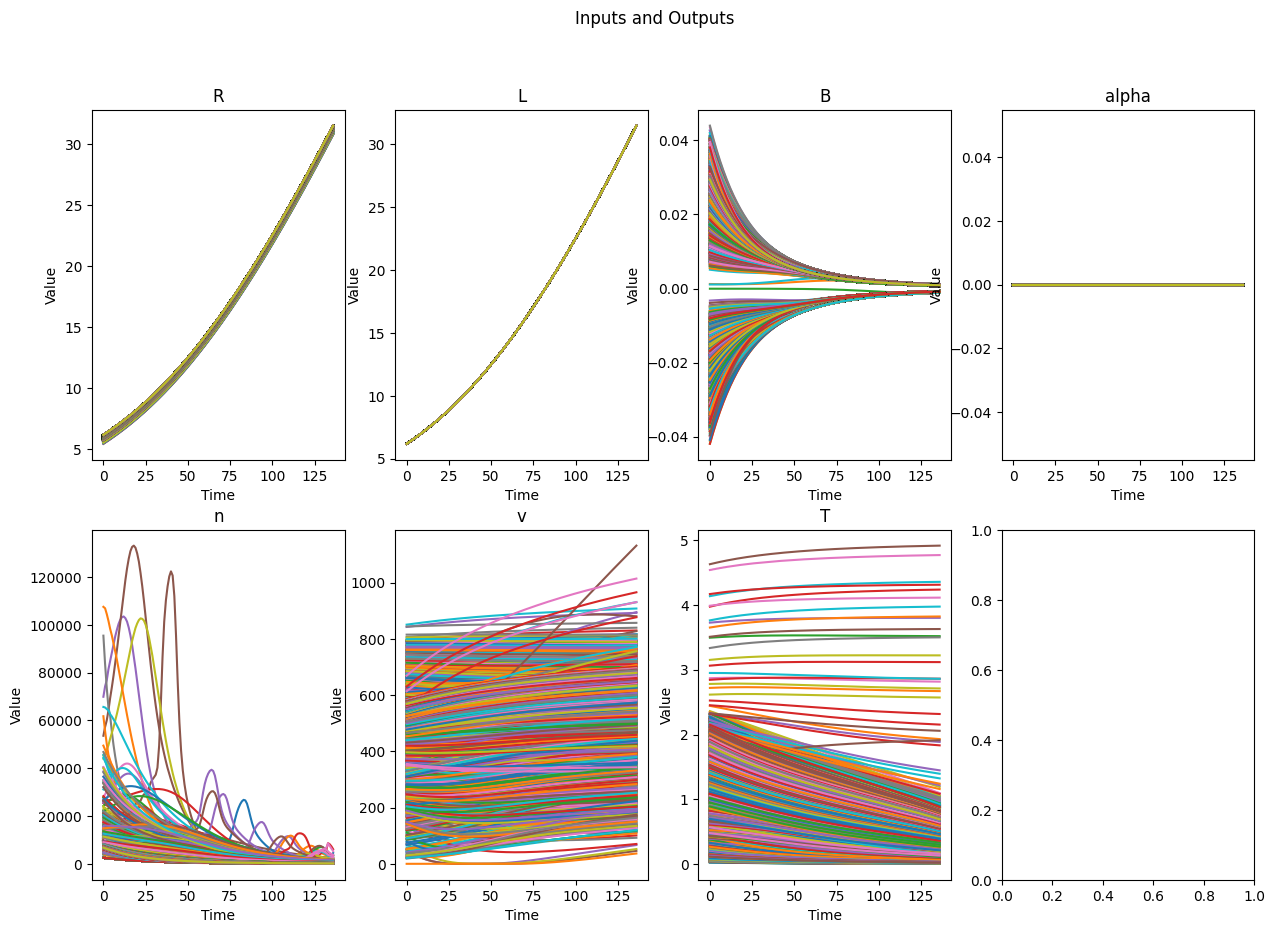

In [18]:
# plot inputs and outputs
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(2, 4, figsize=(15, 10))
fig.suptitle('Inputs and Outputs')

input_names = ['R', 'L', 'B', 'alpha']
output_names = ['n', 'v', 'T']

for i in range(3):
    axs[0, i].plot(X_data[:, i, :].T.numpy())
    axs[0, i].set_title(f'{input_names[i]}')
    axs[0, i].set_xlabel('Time')
    axs[0, i].set_ylabel('Value')
    
    axs[1, i].plot(y_data[:, i, :].T.numpy())
    axs[1, i].set_title(f'{output_names[i]}')
    axs[1, i].set_xlabel('Time')
    axs[1, i].set_ylabel('Value')

    
axs[0, 3].plot(X_data[:, 3, :].T.numpy())
axs[0, 3].set_title(f'{input_names[3]}')
axs[0, 3].set_xlabel('Time')
axs[0, 3].set_ylabel('Value')

plt.show()

In [61]:
y_data[:, 0, :] = torch.log(y_data[:, 0, :])

In [62]:
# load norm parameters
diff_inputs = torch.load('./norm-params/diff_inputs.pt')
diff_outputs = torch.load('./norm-params/diff_outputs.pt')
max_values_inputs = torch.load('./norm-params/max_values_inputs.pt')
min_values_inputs = torch.load('./norm-params/min_values_inputs.pt')
max_values_outputs = torch.load('./norm-params/max_values_outputs.pt')
min_values_outputs = torch.load('./norm-params/min_values_outputs.pt')

In [63]:
max_values_inputs, min_values_inputs, diff_inputs, max_values_outputs, min_values_outputs, diff_outputs

(tensor([31.5014, 31.5014,  0.0427,  0.0000]),
 tensor([ 5.4303,  6.1726, -0.0419,  0.0000]),
 tensor([26.0710, 25.3289,  0.0846,  1.0000]),
 tensor([  11.7989, 1131.5901,    4.9130]),
 tensor([ 2.9820e+00, -7.1320e-05,  5.7649e-03]),
 tensor([   8.8169, 1131.5902,    4.9072]))

In [64]:
# normalize data
X_data_normalized = (X_data - min_values_inputs.unsqueeze(1)) / diff_inputs.unsqueeze(1)
y_data_normalized = (y_data - min_values_outputs.unsqueeze(1)) / diff_outputs.unsqueeze(1)

In [66]:
import torch.nn as nn
import torch.optim as optim

# Model parameters
sequence_length = total_size - segment_to_skip
input_channels = 4
output_channels = 3
batch_size = 32

class SimpleFeedForward(nn.Module):
    def __init__(self, input_channels, output_channels):
        super(SimpleFeedForward, self).__init__()
        self.input_channels = input_channels
        self.output_channels = output_channels
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(input_channels * sequence_length, 2056)
        self.batchnorm1 = nn.BatchNorm1d(2056)
        self.fc2 = nn.Linear(2056, 1024)
        self.batchnorm2 = nn.BatchNorm1d(1024)
        self.fc3 = nn.Linear(1024, 1024)
        self.batchnorm3 = nn.BatchNorm1d(1024)
        self.fc4 = nn.Linear(1024, 2056)
        self.batchnorm4 = nn.BatchNorm1d(2056)
        self.fc5 = nn.Linear(2056, output_channels * sequence_length)
        
        # Do xavier initialization
        layers = [self.fc1, self.fc2, self.fc3, self.fc4, self.fc5]
        for layer in layers:
            nn.init.xavier_uniform_(layer.weight)
            nn.init.zeros_(layer.bias)
            
    def forward(self, x):
        batch_size = x.size(0)
        x = x.reshape(batch_size, -1)
        
        x = self.relu(self.batchnorm1(self.fc1(x)))
        x = self.relu(self.batchnorm2(self.fc2(x)))
        x = self.relu(self.batchnorm3(self.fc3(x)))
        x = self.relu(self.batchnorm4(self.fc4(x)))
        x = self.fc5(x)
        
        x = x.reshape(batch_size, self.output_channels, sequence_length)
        
        return x

# Create an instance of the SimpleConvNet
model = SimpleFeedForward(input_channels, output_channels)

# visualize the model
from torchinfo import summary
summary(model, (batch_size, input_channels, sequence_length))

# load the best model
model = SimpleFeedForward(input_channels, output_channels)
model.load_state_dict(torch.load('./runs/pinn-fnn-2/best_model_pinn_fnn_2.pth'))

<All keys matched successfully>

In [67]:
# show all test predictions in one plot, show the inputs as well
import matplotlib.pyplot as plt

y_pred = model(X_data[:, :, :])

# denormalize
y_pred = y_pred * diff_outputs.unsqueeze(1) + min_values_outputs.unsqueeze(1)

# revert logscale on first channel
y_pred[:, 0, :] = torch.exp(y_pred[:, 0, :])

y_pred = y_pred.detach().numpy()

y_data[:, 0, :] = torch.exp(y_data[:, 0, :])

y_test_ = y_data[:, :, :].detach().numpy()

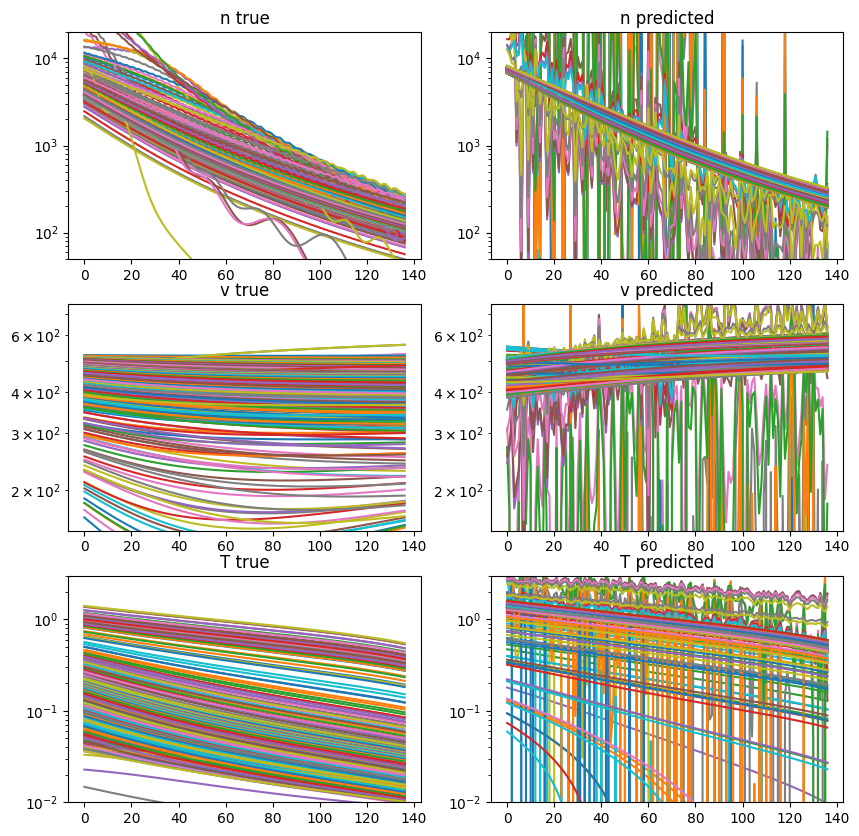

In [68]:
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

output_names = ['n', 'v', 'T']
lims = [[50, 20000], [150, 750], [0.01, 3]]

for i in range(3):
    axs[i, 0].plot(y_test_[:, i, :].T)
    axs[i, 0].set_yscale('log')
    axs[i, 0].set_ylim(lims[i])
    axs[i, 1].plot(y_pred[:, i, :].T)
    axs[i, 1].set_yscale('log')
    axs[i, 1].set_ylim(lims[i])
    
    axs[i, 0].set_title(f'{output_names[i]} true')
    axs[i, 1].set_title(f'{output_names[i]} predicted')
plt.show()
